# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import analyzer
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Waited an hour to check-in ...
1,Not Verified | Not a great experience at all...
2,✅ Trip Verified | Boarding was difficult caus...
3,✅ Trip Verified | Boarding started with a del...
4,✅ Trip Verified | Absolutely horrible custome...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df['reviews']=df['reviews'].str.replace('✅ Trip Verified |','')
df['reviews']=df['reviews'].str.replace('Not Verified |','')
df.dropna()
df.drop_duplicates()

,reviews
0,Waited an hour to check-in at the Paphos bus...
1,"Not a great experience at all, from the out..."
2,Boarding was difficult caused by vast majori...
3,Boarding started with a delay of some 20 min...
4,Absolutely horrible customer service - will ...
...,...
3764,Flew LHR - VIE return operated by bmi but BA a...
3765,LHR to HAM. Purser addresses all club passenge...
3766,My son who had worked for British Airways urge...
3767,London City-New York JFK via Shannon on A318 b...


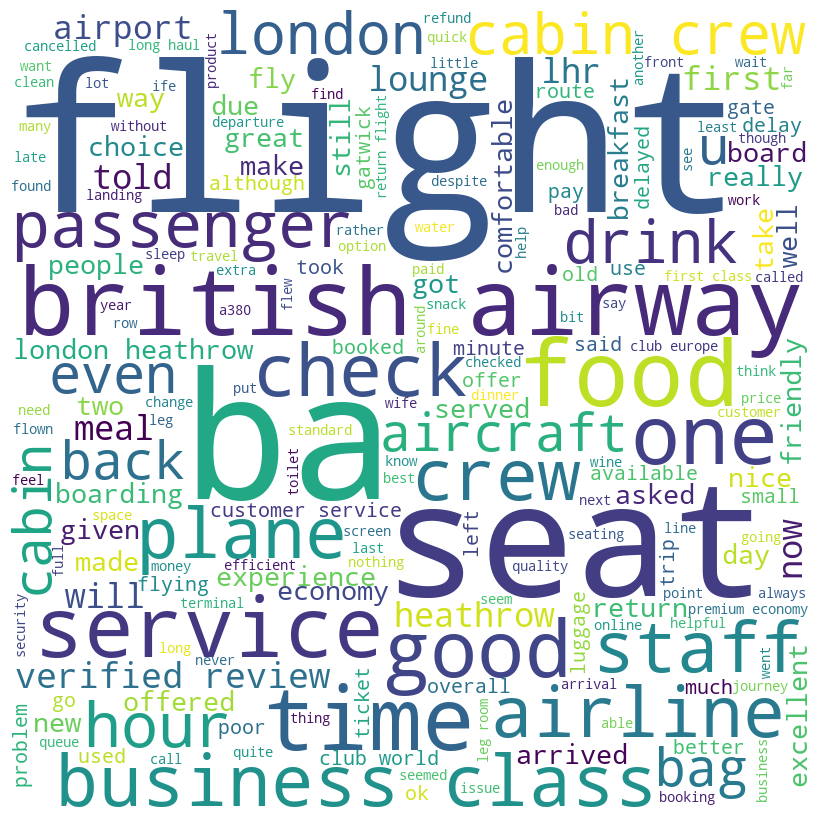

In [6]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

for val in df.reviews:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [8]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('TextBlob')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading TextBlob: Package 'TextBlob' not found in
[nltk_data]     index


False

In [9]:
from textblob import TextBlob

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

nltk.download('stopwords')


# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text



analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    blob=TextBlob(text).sentiment
    sentiment=int(blob.polarity*100)
    
    return sentiment

def get_subjectivity(text):
    blob=TextBlob(text).sentiment
    subjectivity=int(blob.subjectivity*100)
    
    return subjectivity

# apply get_sentiment function
df['reviews'] = df['reviews'].apply(preprocess_text)
df['sentiment'] = df['reviews'].apply(get_sentiment)
df['subjectivity']=df['reviews'].apply(get_subjectivity)

df

,reviews,sentiment,subjectivity
0,waited hour check-in paphos business check-in ...,-45,47
1,"great experience , outset poorly managed bused...",0,51
2,boarding difficult caused vast majority passen...,4,56
3,"boarding started delay 20 minute , everybody c...",22,59
4,absolutely horrible customer service - never f...,-17,41
...,...,...,...
3764,flew lhr - vie return operated bmi ba aircraft...,36,52
3765,lhr ham . purser address club passenger name b...,17,42
3766,son worked british airway urged fly british ai...,11,25
3767,london city-new york jfk via shannon a318 real...,34,44


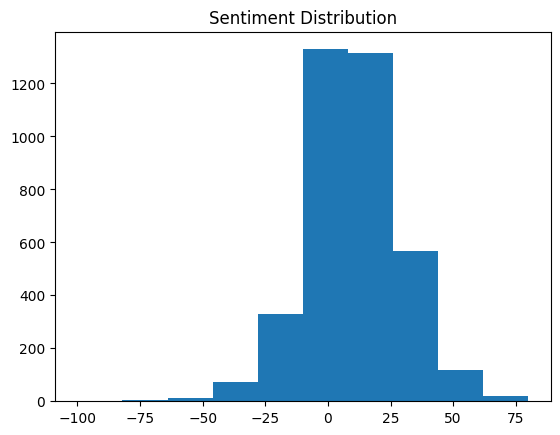

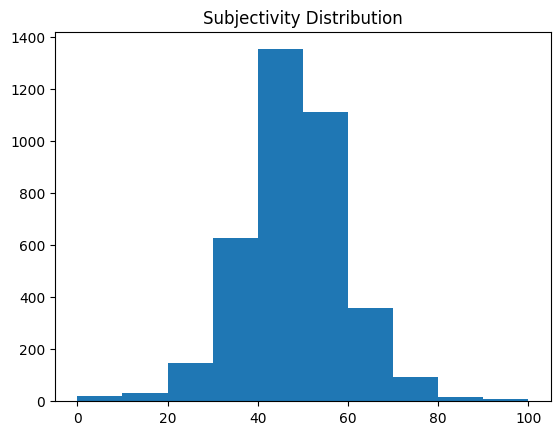

In [51]:
plt.hist(df['sentiment'],bins=10)
plt.title("Sentiment Distribution")
plt.show()
plt.hist(df['subjectivity'],bins=10)
plt.title("Subjectivity Distribution")
plt.show()

Number of rows with positive values in the range: 2279
Number of rows with neutral values in the range: 915
Number of rows with negative values in the range: 738


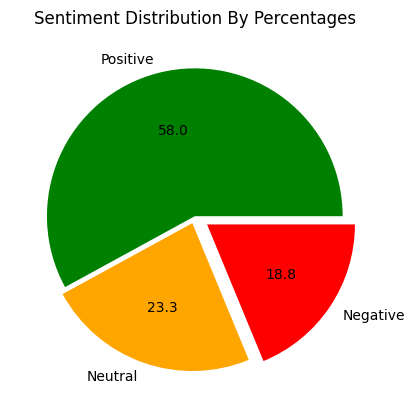

In [62]:
print("Number of rows with positive values in the range:",
      df['sentiment'].between(5, 100).sum())
print("Number of rows with neutral values in the range:",
      df['sentiment'].between(-5, 5).sum())
print("Number of rows with negative values in the range:",
      df['sentiment'].between(-100, -5).sum())

import numpy as np

y=np.array([df['sentiment'].between(5, 100).sum(),df['sentiment'].between(-5, 5).sum(),df['sentiment'].between(-100, -5).sum()])
ylabels=['Positive','Neutral','Negative']
myexplode = [0, 0.05, 0.1]
mycolors = ["green", "orange", "red"]
plt.pie(y,labels=ylabels,explode=myexplode,colors=mycolors,shadow = False,autopct='%.1f')
plt.gcf().set_facecolor('none')
plt.title("Sentiment Distribution By Percentages")
plt.savefig('GraphOutputs/sentiment-piechart.png', dpi=1200)
plt.show()

In [48]:
from pandasql import sqldf

q = "SELECT reviews FROM df WHERE sentiment<-5 AND subjectivity<50 ORDER BY subjectivity DESC"
result_df=sqldf(q,globals())

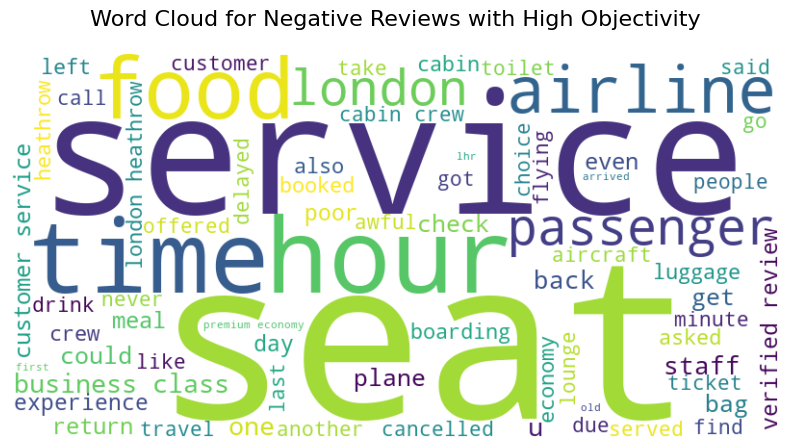

In [74]:
negative_reviews_text = ' '.join(result_df['reviews'])

stop_words = set(stopwords.words('english'))
stop_words.update({'british','ba','airway','airway','flight','told','airport','would','n'+"'"+'t'})

wordcloud = WordCloud(width=800, height=400, background_color='rgba(255, 255, 255, 0)', max_words=70, stopwords=stop_words).generate(negative_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews with High Objectivity',pad=20,fontsize=16)
plt.axis('off')
plt.savefig('GraphOutputs/negative-review-wordcloud.png', dpi=900)
plt.show()